# Dataset

In [ ]:
!pip install yfinance
!pip install statsmodels
!pip install pandas-ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Meingimport Library

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

Mendownload Dataset dan Mengevalusasi Dataset

In [ ]:
data = yf.download("BBCA.JK", start="2012-10-1", end="2022-10-1")


[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-10-01 00:00:00+07:00,1570.0,1590.0,1560.0,1570.0,1363.329590,52115000
2012-10-02 00:00:00+07:00,1580.0,1590.0,1570.0,1580.0,1372.013306,14870000
2012-10-03 00:00:00+07:00,1570.0,1590.0,1570.0,1570.0,1363.329590,29290000
2012-10-04 00:00:00+07:00,1580.0,1590.0,1570.0,1580.0,1372.013306,46405000
2012-10-05 00:00:00+07:00,1570.0,1590.0,1570.0,1570.0,1363.329590,74300000


In [ ]:
dataout = data
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-10-01 00:00:00+07:00,1570.0,1590.0,1560.0,1570.0,1363.329590,52115000
2012-10-02 00:00:00+07:00,1580.0,1590.0,1570.0,1580.0,1372.013306,14870000
2012-10-03 00:00:00+07:00,1570.0,1590.0,1570.0,1570.0,1363.329590,29290000
2012-10-04 00:00:00+07:00,1580.0,1590.0,1570.0,1580.0,1372.013306,46405000
2012-10-05 00:00:00+07:00,1570.0,1590.0,1570.0,1570.0,1363.329590,74300000
...,...,...,...,...,...,...
2022-09-26 00:00:00+07:00,8200.0,8500.0,8200.0,8425.0,8392.236328,106228200
2022-09-27 00:00:00+07:00,8375.0,8450.0,8300.0,8300.0,8267.721680,89567100
2022-09-28 00:00:00+07:00,8250.0,8425.0,8250.0,8325.0,8292.625000,89153400


In [ ]:
0

0

In [ ]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Mengisi data yang kosong dengan nilai data sebelumnya

In [ ]:
data = data.bfill()

In [ ]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.shape

(2482, 6)

Mengambil column yang dibutuhkan di dataset

In [ ]:
data_close = data['Close']

In [ ]:
data_x = data.drop(['Adj Close','Volume','Close'],axis=1)
data_x

,Open,High,Low
Date,,,
2012-10-01 00:00:00+07:00,1570.0,1590.0,1560.0
2012-10-02 00:00:00+07:00,1580.0,1590.0,1570.0
2012-10-03 00:00:00+07:00,1570.0,1590.0,1570.0
2012-10-04 00:00:00+07:00,1580.0,1590.0,1570.0
2012-10-05 00:00:00+07:00,1570.0,1590.0,1570.0
...,...,...,...
2022-09-26 00:00:00+07:00,8200.0,8500.0,8200.0
2022-09-27 00:00:00+07:00,8375.0,8450.0,8300.0
2022-09-28 00:00:00+07:00,8250.0,8425.0,8250.0


In [ ]:
data_x.describe()

,Open,High,Low
count,2482.000000,2482.000000,2482.000000
mean,4312.919017,4353.450846,4270.749396
std,1928.307591,1945.189865,1909.512121
min,1570.000000,1590.000000,1560.000000
25%,2610.000000,2630.000000,2595.000000
50%,4107.500000,4140.000000,4065.000000
75%,6060.000000,6100.000000,6005.000000
max,8700.000000,8875.000000,8550.000000


Memvisualisasi Dataset

In [ ]:
import plotly.express as px
fig = px.line(data, x= data.index , y= 'Close')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.update_layout(title_text="Data Saham BBCA")
fig.show()

# Mengecek Stasioner Dataset

In [ ]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(time_series):
  df_test = adfuller(time_series)

  print('{:25s} {:.6f}'.format("\033[1m ADF Statistic ",df_test[0]))
  print('{:25s} {:.6f}\n'.format("\033[1m p-value ",df_test[1]))

  if df_test[0] > df_test[4]["5%"]:
    print  ("\033[36m\033[1mDataset Tidak Stasioner\n")
  else:
    print ("\033[36m\033[1mDataset Telah Stasioner\n")

In [ ]:
stationarity_test(data_close)

 ADF Statistic        0.134498
 p-value              0.968339

Dataset Tidak Stasioner



# Melakukan I(Diferencing) untuk mendapatkan data stasioner dan mencari nilai d

Melakukan diferencing dikarekan dataset tidak stasioner maka akan dilakukan stasioner data.

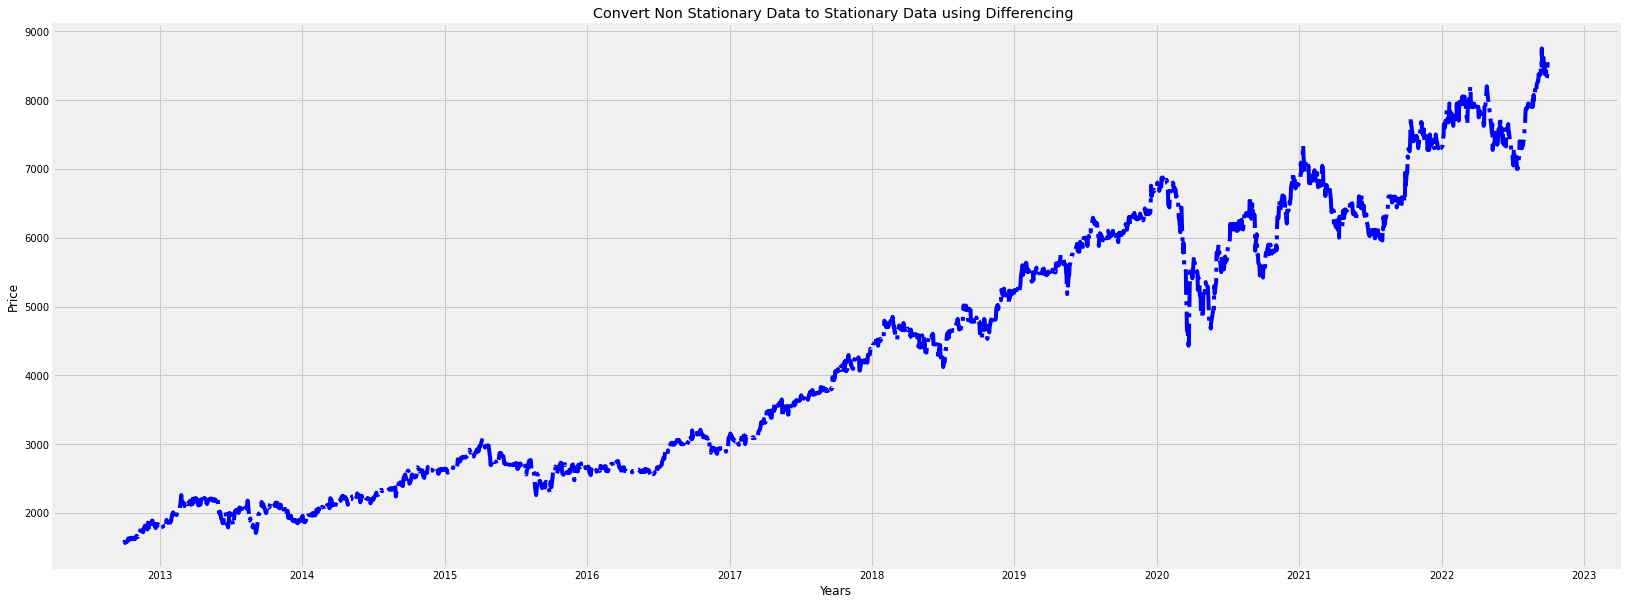

In [ ]:
plt.figure(figsize= (25,10))
plt.xlabel('Years')
plt.ylabel('Price')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(data_close, 'b-.')

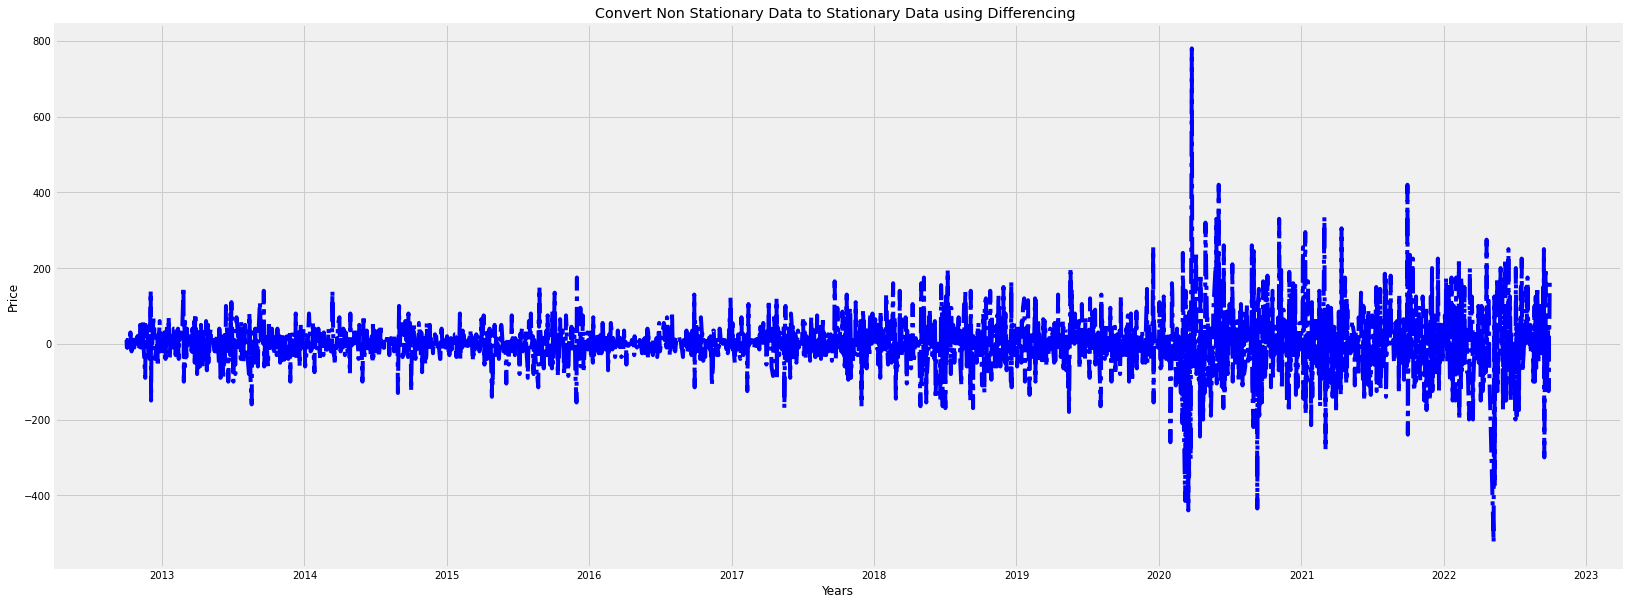

In [ ]:
data_close1 = data_close.diff(1).bfill() # First order differencing
plt.figure(figsize= (25,10))
plt.xlabel('Years')
plt.ylabel('Price')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(data_close1, 'b-.')

In [ ]:
stationarity_test(data_close1)

 ADF Statistic        -16.831982
 p-value              0.000000

Dataset Telah Stasioner



Saat Mengecek stasioner pada diferencing 1, maka data dikatakan telah stasioner dan kita mendapatkan nilai d yaitu sama dengan 1

# Mencari Nilai AR(Auto-Regressive) atau p

AR order (p)

Text(0, 0.5, 'Partial Autocorrelation Function')

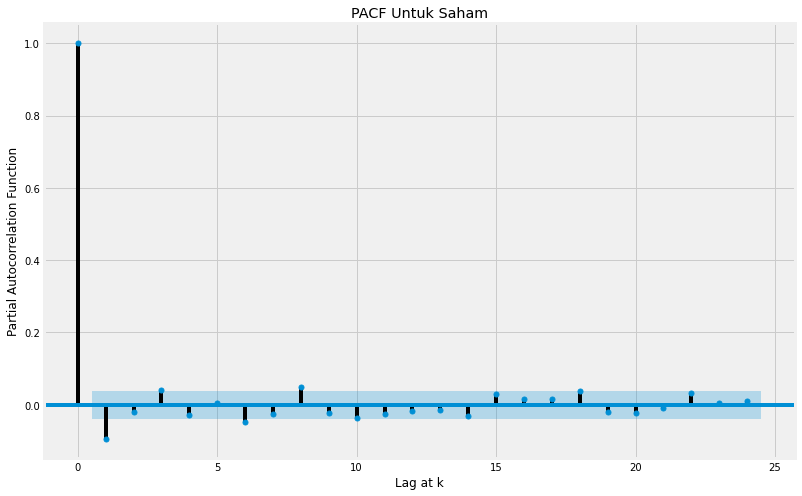

In [ ]:
plot_pacf(data_close1, lags=24)
plt.title("PACF Untuk Saham")
plt.xlabel("Lag at k")
plt.ylabel("Partial Autocorrelation Function")

# Mencari Nilai MA(Moving Average) atau q

MA order(q)

Text(0.5, 1.0, 'Autocorrelation Function Saham')

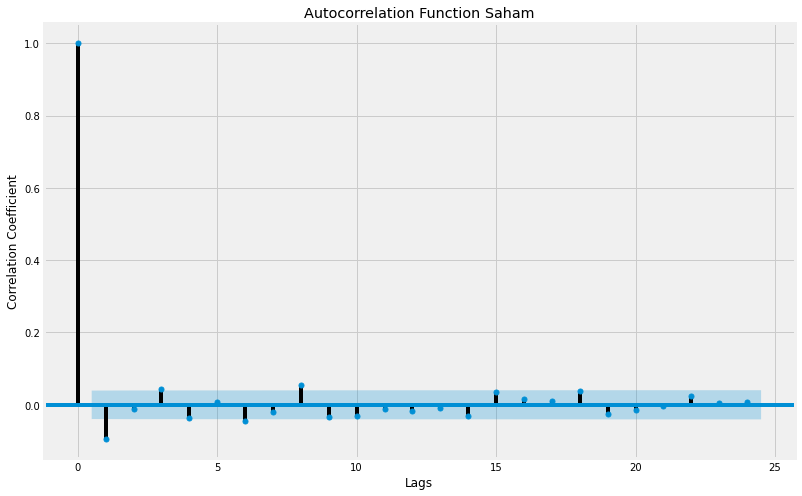

In [ ]:
plot_acf(data_close1, lags=24)
plt.xlabel('Lags')
plt.ylabel("Correlation Coefficient")
plt.title('Autocorrelation Function Saham')

# Membagi Data train dan test

Split Dataset

In [ ]:
n = int(len(data_close) * 0.8)
train_data = data_close[:n]
test_data = data_close[n:]


print(len(test_data))
train_data

497


Date
2012-10-01 00:00:00+07:00    1570.0
2012-10-02 00:00:00+07:00    1580.0
2012-10-03 00:00:00+07:00    1570.0
2012-10-04 00:00:00+07:00    1580.0
2012-10-05 00:00:00+07:00    1570.0
                              ...  
2020-09-10 00:00:00+07:00    5810.0
2020-09-11 00:00:00+07:00    5905.0
2020-09-14 00:00:00+07:00    6050.0
2020-09-15 00:00:00+07:00    5860.0
2020-09-16 00:00:00+07:00    5750.0
Name: Close, Length: 1985, dtype: float64

In [ ]:
n = int(len(data_x) * 0.8)
train_data_x = data_x[:n]
test_data_x = data_x[n:]

print(len(test_data))
print(len(train_data))
print(len(test_data_x))
print(len(train_data_x))


497
1985
497
1985


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data.index, y=train_data, name='Training',
                         line_color='royalblue'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data, name='Testing',
                         line = dict(color='forestgreen',dash='dot')))
                         

# Edit the layout
fig.update_layout(title='Data Train dan Test',
                   xaxis_title='Tanggal',
                   yaxis_title='Close')

fig.update_xaxes(showgrid=True, ticklabelmode="period")
fig.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1,subplot_titles=('Open', 'High', 'Low'))

fig.append_trace(go.Scatter(
    x=train_data_x.index, y=train_data_x['Open'],
    name='Trainning Open'
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=test_data_x.index, y=test_data_x['Open'],
    name='Testing Open',
    line = dict(color='forestgreen',dash='dot')
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=train_data_x.index, y=train_data_x['High'],
    name='Training High'
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=test_data_x.index, y=test_data_x['High'],
    name='Testing High',
    line = dict(color='forestgreen',dash='dot')
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=train_data_x.index, y=train_data_x['Low'],
    name='Training Low',
), row=3, col=1)

fig.append_trace(go.Scatter(
    x=test_data_x.index, y=test_data_x['Low'],
    name='Testing Low',
    line = dict(color='forestgreen',dash='dot')
), row=3, col=1)


fig.update_layout(title_text="Data train dan test variabel x")
fig.show()

# Modeling Dengan **ARIMA**

Modeling Arima

In [ ]:
# Build Model
model_arima = sm.tsa.arima.ARIMA(train_data, order=(1, 1, 1))  
fitted = model_arima.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1985
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10959.324
Date:                Fri, 20 Jan 2023   AIC                          21924.648
Time:                        08:28:23   BIC                          21941.426
Sample:                             0   HQIC                         21930.811
                               - 1985                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7469      0.127     -5.883      0.000      -0.996      -0.498
ma.L1          0.7773      0.120      6.493      0.000       0.543       1.012
sigma2      3676.9097     44.886     81.917      0.0

In [ ]:
fc = fitted.get_forecast(497).summary_frame()

In [ ]:
# Make a forecast ARIMA model
fc = fitted.get_forecast(497).summary_frame()
# Make as pandas series
forecast_arima = pd.Series(fc['mean'].values, index=test_data.index)
lower_arima = pd.Series(fc['mean_ci_lower'].values, index=test_data.index)
upper_arima = pd.Series(fc['mean_ci_upper'].values, index=test_data.index)

# Melakukan Visualisasi Hasil Forecasting ARIMA

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
# fig.add_trace(go.Scatter(x=train_data.index, y=train_data, name='Training',
#                          line_color='royalblue'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data, name='Testing',
                         line = dict(color='forestgreen',dash='dot')))
fig.add_trace(go.Scatter(x=test_data.index, y=forecast_arima, name='Forecast',
                         line=dict(color='blue',dash='dot')))
fig.add_trace(go.Scatter(x=lower_arima.index, y=lower_arima, name='Interval Turun',
                         line_color='yellow'))
fig.add_trace(go.Scatter(x=upper_arima.index, y=upper_arima, name='Interval Naik',
                         line_color='yellow',
                         fill='tonextx',
                         fillcolor = 'rgba(0, 0, 255, 0.2)')) #['none', 'tozeroy', 'tozerox', 'tonexty', 'tonextx','toself', 'tonext']
                         

# Edit the layout
fig.update_layout(title='Perbandingan Forecast dengan Aktual Model Arima',
                   xaxis_title='Tanggal',
                   yaxis_title='Harga Saham')

fig.update_xaxes(showgrid=True, ticklabelmode="period", rangeslider_visible=True)
fig.show()


# Modeling Dengan ARIMAX

In [ ]:
model_arimax = sm.tsa.arima.ARIMA(train_data, order=(1, 1, 1), exog=train_data_x)
model_fit = model_arimax.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1985
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9549.597
Date:                Fri, 20 Jan 2023   AIC                          19111.194
Time:                        08:28:26   BIC                          19144.751
Sample:                             0   HQIC                         19123.521
                               - 1985                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.3504      0.007    -49.724      0.000      -0.364      -0.337
High           0.5933      0.005    117.287      0.000       0.583       0.603
Low            0.7590      0.007    104.790      0.0

In [ ]:
# Forecast
fc = model_fit.get_forecast(497, exog=test_data_x).summary_frame()
# Make as pandas series
forecast_arimax = pd.Series(fc['mean'].values, index=test_data.index)
lower_arimax = pd.Series(fc['mean_ci_lower'].values, index=test_data.index)
upper_arimax = pd.Series(fc['mean_ci_upper'].values, index=test_data.index)

In [ ]:
fc

Close,mean,mean_se,mean_ci_lower,mean_ci_upper
1985,5756.977041,29.746435,5698.675100,5815.278982
1986,5632.071617,29.754704,5573.753469,5690.389766
1987,5672.089703,29.754717,5613.771529,5730.407878
1988,5488.037533,29.754718,5429.719358,5546.355709
1989,5520.634551,29.754719,5462.316375,5578.952728
...,...,...,...,...
2477,8392.825493,29.754967,8334.506830,8451.144157
2478,8377.746832,29.754968,8319.428168,8436.065497
2479,8368.760495,29.754968,8310.441829,8427.079161
2480,8414.240936,29.754969,8355.922269,8472.559603


# Melakukan Visualisasi Hasil Forecasting **ARIMAX**

In [ ]:
# Make as pandas series
forecast_arimax = pd.Series(fc['mean'].values, index=test_data.index)
lower_arimax = pd.Series(fc['mean_ci_lower'].values, index=test_data.index)
upper_arimax = pd.Series(fc['mean_ci_upper'].values, index=test_data.index)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data.index, y=train_data, name='Training',
                         line_color='royalblue'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data, name='Testing',
                         line = dict(color='forestgreen',dash='dot')))
fig.add_trace(go.Scatter(x=forecast_arimax.index, y=forecast_arimax, name='Forecast',
                         line=dict(color='royalblue',dash='dot')))
# fig.add_trace(go.Scatter(x=lower_arimax.index, y=lower_arimax, name='Interval Turun',
#                          line=dict(color='grey',width=0.5,),
#                          fill='tonexty',
#                          fillcolor = 'rgba(0, 0, 255, 0.2)'))
# fig.add_trace(go.Scatter(x=upper_arimax.index, y=upper_arimax, name='Interval Naik',
#                          line=dict(color='grey',width=0.5,),
#                          fill='tonexty',
#                          fillcolor = 'rgba(0, 0, 255, 0.2)')) #['none', 'tozeroy', 'tozerox', 'tonexty', 'tonextx','toself', 'tonext']
                         

# Edit the layout
fig.update_layout(title='Perbandingan Forecast dengan Aktual Model Arimax',
                   xaxis_title='Tanggal',
                   yaxis_title='Harga Saham')

fig.update_xaxes(showgrid=True, ticklabelmode="period",rangeslider_visible=True)
fig.show()

# Melakukan Evaluasi Metric Error Model Arima dan Sarima

In [ ]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric Arima:')
    print('')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    
    
timeseries_evaluation_metrics_func(test_data,forecast_arima)

Evaluation metric Arima:

MSE is : 2181551.8928322364
MAE is : 1291.4448414338042
RMSE is : 1477.0077497536147
MAPE is : 17.494682277621767


In [ ]:
MSE_ARIMA = ('%.2f' % metrics.mean_squared_error(test_data,forecast_arima))
MAE_ARIMA = ('%.2f' % metrics.mean_absolute_error(test_data,forecast_arima))
RMSE_ARIMA = ('%.2f' % np.sqrt(metrics.mean_squared_error(test_data,forecast_arima)))
def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_ARIMA = (('%.2f' % mean_absolute_percentage_error(test_data,forecast_arima)))

In [ ]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results Arimax:')
    print('')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    
    
timeseries_evaluation_metrics_func(test_data,forecast_arimax)

Evaluation metric results Arimax:

MSE is : 2543.8967495114593
MAE is : 39.14962139875142
RMSE is : 50.43705730424267
MAPE is : 0.5534615455421271


In [ ]:
MSE_ARIMAX = ('%.2f' % metrics.mean_squared_error(test_data, forecast_arimax))
MAE_ARIMAX = ('%.2f' % metrics.mean_absolute_error(test_data, forecast_arimax))
RMSE_ARIMAX = ('%.2f' % np.sqrt(metrics.mean_squared_error(test_data, forecast_arimax)))

def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE_ARIMAX = ('%.2f' % mean_absolute_percentage_error(test_data, forecast_arimax))

In [ ]:
d = {'Error_Arima': [MSE_ARIMA, MAE_ARIMA, RMSE_ARIMA, MAPE_ARIMA], 'Error_Arimax': [MSE_ARIMAX, MAE_ARIMAX, RMSE_ARIMAX, MAPE_ARIMAX]}
error_model = pd.DataFrame(data=d, index=['MSE', 'MAE', 'RMSE', 'MAPE'])
error_model

,Error_Arima,Error_Arimax
MSE,2181551.89,2543.90
MAE,1291.44,39.15
RMSE,1477.01,50.44
MAPE,17.49,0.55


# Revision year

In [ ]:
new_data = yf.download("BBCA.JK", start="2018-1-1", end="2022-12-31")
data_p = new_data.Close
data_xx = new_data.drop(['Adj Close', 'Volume', 'Close'],axis=1)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_p_2018 = data_p.loc['2018-01-01':'2018-12-31']
data_p_2019 = data_p.loc['2019-01-01':'2019-12-31']
data_p_2020 = data_p.loc['2020-01-01':'2020-12-31']
data_p_2021 = data_p.loc['2021-01-01':'2021-12-31']
data_p_2022 = data_p.loc['2022-01-01':'2022-12-31']

In [ ]:
import plotly.graph_objects as go

date_2018 = [data_p_2018.sum()] 
date_2019 = [data_p_2019.sum()] 
date_2020 = [data_p_2020.sum()] 
date_2021 = [data_p_2021.sum()] 
date_2022 = [data_p_2022.sum()] 

fig = go.Figure(data=[
    go.Bar(name='2018', x=['2018'], y=date_2018,text=date_2018),
    go.Bar(name='2019', x=['2019'], y=date_2019,text=date_2019),
    go.Bar(name='2020', x=['2020'], y=date_2020,text=date_2020),
    go.Bar(name='2021', x=['2021'], y=date_2021,text=date_2021),
    go.Bar(name='2022', x=['2022'], y=date_2022,text=date_2022)
])
# Change the bar mode
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(barmode='group')
fig.show()

In [ ]:
harga1 = int(data_p_2018.sum())
harga2 = int(data_p_2019.sum())
harga3 = int(data_p_2020.sum())
harga4 = int(data_p_2021.sum())
harga5 = int(data_p_2022.sum())
print(harga2-harga1)
print(harga3-harga2)
print(harga4-harga3)
print(harga5-harga4)

288660
-57010
205480
306800


# Revision visual

In [ ]:
data_y = new_data.loc['2022-01-01':'2022-12-31']
data_y = data_y.Close
data_xx = new_data.loc['2022-01-01':'2022-12-31']
data_xx = data_xx.drop(['Adj Close','Volume','Close'],axis=1)

In [ ]:
data_y.isnull().sum()

0

In [ ]:
data_xx.shape

(246, 3)

In [ ]:
stationarity_test(data_y)

 ADF Statistic        -1.504990
 p-value              0.531042

Dataset Tidak Stasioner



In [ ]:
data_y_1 = data_y.diff(1).bfill() 

In [ ]:
stationarity_test(data_y_1)

 ADF Statistic        -18.943286
 p-value              0.000000

Dataset Telah Stasioner



Text(0, 0.5, 'Partial Autocorrelation Function')

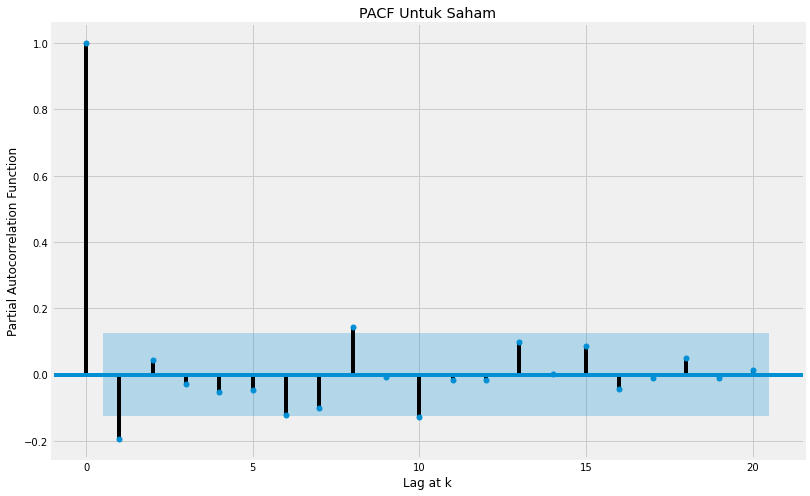

In [ ]:
plot_pacf(data_y_1, lags=20)
plt.title("PACF Untuk Saham")
plt.xlabel("Lag at k")
plt.ylabel("Partial Autocorrelation Function")

In [ ]:
n = int(len(data_y))
train_data_y = data_y[:n]
start_train_data_y = data_y[:n]
end_train_data_y = data_y[n:]

n = int(len(data_xx))
train_data_xx = data_xx[:n]
test_data_xx = data_xx[n:]

print(train_data_y.shape)
print(test_data_xx.shape)

(246,)
(0, 3)


In [ ]:
model_arimax = sm.tsa.SARIMAX(train_data_y,order=(1, 1, 1), exog=data_xx)
model_fitt = model_arimax.fit()
print(model_fitt.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  246
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1304.616
Date:                Fri, 20 Jan 2023   AIC                           2621.232
Time:                        08:28:28   BIC                           2642.240
Sample:                             0   HQIC                          2629.692
                                - 246                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.5403      0.047    -11.423      0.000      -0.633      -0.448
High           0.8515      0.063     13.510      0.000       0.728       0.975
Low            0.6786      0.056     12.025      0.0

In [ ]:
import datetime as dt

data_p_2023_index = data_y.index.to_series().apply(lambda x: dt.datetime.strftime(x, '2023-%m-%d')).tolist()
df = pd.Series(data_y.values, index=data_p_2023_index)

In [ ]:
future_x = data_xx[-22:]

In [ ]:
# Forecast
fc_new = model_fitt.get_forecast(22, exog=future_x).summary_frame()
fc_new = fc_new.sort_index(ascending=False)
fc_new = fc_new.reset_index()

In [ ]:
fc_new

Close,index,mean,mean_se,mean_ci_lower,mean_ci_upper
0,267,8601.629826,50.138440,8503.360288,8699.899364
1,266,8552.135903,50.138440,8453.866367,8650.405440
2,265,8561.110251,50.138440,8462.840715,8659.379787
3,264,8605.089295,50.138439,8506.819760,8703.358830
4,263,8586.929920,50.138439,8488.660386,8685.199455
5,262,8530.848411,50.138438,8432.578878,8629.117944
6,261,8599.363738,50.138438,8501.094205,8697.633270
7,260,8647.664280,50.138437,8549.394748,8745.933811
8,259,8615.136351,50.138437,8516.866820,8713.405882
9,258,8637.617224,50.138437,8539.347694,8735.886754


In [ ]:
fc_neww = model_fitt.get_prediction(start=1, end=5,exog=future_x).summary_frame()

In [ ]:
import datetime as dt
fc_neww_index = data_y.index.to_series().apply(lambda x: dt.datetime.strftime(x, '2023-%m-%d')).tolist()

In [ ]:
import pandas as pd
index_new = pd.bdate_range(start='1/1/2023', end='31/1/2023')
index_new

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-23',
               '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27',
               '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
test_data_y

Date
2022-01-03 00:00:00+07:00    7325.0
2022-01-04 00:00:00+07:00    7400.0
2022-01-05 00:00:00+07:00    7450.0
2022-01-06 00:00:00+07:00    7475.0
2022-01-07 00:00:00+07:00    7650.0
                              ...  
2022-12-26 00:00:00+07:00    8575.0
2022-12-27 00:00:00+07:00    8600.0
2022-12-28 00:00:00+07:00    8650.0
2022-12-29 00:00:00+07:00    8575.0
2022-12-30 00:00:00+07:00    8550.0
Name: Close, Length: 246, dtype: float64

In [ ]:
# Make as pandas series
forecast_arimax_new = pd.Series(fc_new['mean'].values, index=index_new)
lower_arimax_new = pd.Series(fc_new['mean_ci_lower'].values, index=index_new)
upper_arimax_new = pd.Series(fc_new['mean_ci_upper'].values, index=index_new)

In [ ]:
df = forecast_arimax_new.to_frame()
df.rename({0: 'Close'}, axis=1,inplace=True)

In [ ]:
import pandas_ta as ta

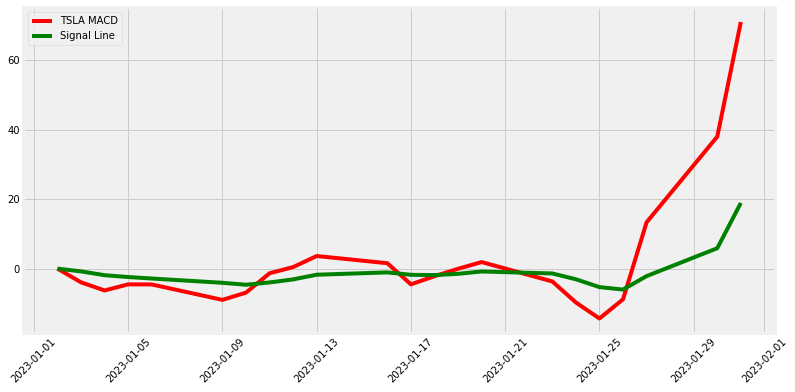

In [ ]:
## MACD Line ##
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
## Signal Line ##
signal = MACD.ewm(span=9, adjust=False).mean()
plt.figure(figsize=(12,6))
plt.plot(df.index, MACD, label="TSLA MACD",color='red')
plt.plot(df.index, signal, label='Signal Line',color='green')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#function that indicates buy/sell signal
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal["Close"][i])
                flag = 1 
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0
                
            else:
                Sell.append(np.nan)
            
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
                
    return(Buy, Sell)

In [ ]:
df['MACD'] = MACD
df['Signal Line'] = signal
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [ ]:
forecast_arimax_new

2023-01-02    8601.629826
2023-01-03    8552.135903
2023-01-04    8561.110251
2023-01-05    8605.089295
2023-01-06    8586.929920
2023-01-09    8530.848411
2023-01-10    8599.363738
2023-01-11    8647.664280
2023-01-12    8615.136351
2023-01-13    8637.617224
2023-01-16    8580.873011
2023-01-17    8525.122853
2023-01-18    8613.732290
2023-01-19    8617.191751
2023-01-20    8620.319822
2023-01-23    8531.710128
2023-01-24    8510.089860
2023-01-25    8510.413283
2023-01-26    8622.652843
2023-01-27    8845.340545
2023-01-30    8938.639736
2023-01-31    9115.608741
Freq: B, dtype: float64

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=data_p_2022.index, y=data_p_2022, name='Testing',
                         line_color='green'))
fig.add_trace(go.Scatter(x=forecast_arimax_new.index, y=forecast_arimax_new, name='Forecast',
                         mode='lines+markers',
                         line_color='royalblue'))
fig.add_trace(go.Scatter(x=lower_arimax_new.index, y=lower_arimax_new, name='Interval Turun',
                         mode='lines',
                         line=dict(color='grey',width=0.9,),
                         fill='tonexty',
                         fillcolor = 'rgba(0, 0, 255, 0.1)'))
fig.add_trace(go.Scatter(x=upper_arimax_new.index, y=upper_arimax_new, name='Interval Naik',
                         mode='lines',
                         line=dict(color='grey',width=0.5,),
                         fill='tonexty',
                         fillcolor = 'rgba(0, 0, 255, 0.2)')) #['none', 'tozeroy', 'tozerox', 'tonexty', 'tonextx','toself', 'tonext']
fig.add_trace(go.Scatter(x=df.index, y=df['Buy_Signal_Price'], name='Sinyal Pembelian',
                         mode='markers',
                         marker=dict(
                         symbol='triangle-up',
                         color='green',
                         size=12),
                         line_color='green')) #['none', 'tozeroy', 'tozerox', 'tonexty', 'tonextx','toself', 'tonext']
fig.add_trace(go.Scatter(x=df.index, y=df['Sell_Signal_Price'], name='Sinyal Penjualan',
                         mode='markers',
                         marker=dict(
                         symbol='triangle-down',
                         color='red',
                         size=12),
                         line_color='red')) #['none', 'tozeroy', 'tozerox', 'tonexty', 'tonextx','toself', 'tonext']
                         

# Edit the layout
fig.update_layout(title='Perbandingan Forecast dengan Aktual Model Arimax',
                   xaxis_title='Tanggal',
                   yaxis_title='Harga Saham')
fig.update_xaxes(showgrid=True, ticklabelmode="period",rangeslider_visible=True)
fig.show()

# 3 bulan terakhir

In [ ]:
new_dataa = yf.download("BBCA.JK", start="2022-1-1", end="2022-12-31")
df_pp = new_dataa.Close

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_p_2022_11 = df_pp.loc['2022-11-01':'2022-11-30']
data_p_2022_12 = df_pp.loc['2022-12-01':'2022-12-31']
data_p_2023_1 = df.loc['2023-01-01':'2023-12-31']

data_p_2023_1 = df['Close']
data_p_2023_1.index.name = 'Date'

In [ ]:
print(data_p_2022_11.sum())
print(data_p_2022_12.sum())
print(data_p_2023_1.sum())

194725.0
189925.0
189969.220060872


In [ ]:
import plotly.graph_objects as go

date_2022_11 = [data_p_2022_11.sum()] 
date_2022_12 = [data_p_2022_12.sum()] 
date_2023_1 = [data_p_2023_1.sum()] 

x1 = ['2022 Bulan Nov']
x2 = ['2022 Bulan Des']
x3 = ['2023 Bulan Jan<br>Secara Prediksi']

fig = go.Figure()
fig.add_trace(go.Bar(x=x1, y=date_2022_11,name='2022 Bulan Nov',text=date_2022_11,texttemplate = "%{value:.6s}"))
fig.add_trace(go.Bar(x=x2, y=date_2022_12,name='2022 Bulan Des',text=date_2022_12,texttemplate = "%{value:.6s}"))
fig.add_trace(go.Bar(x=x3, y=date_2023_1,name='2023 Bulan Jan<br>Secara Prediksi',text=date_2023_1,texttemplate = "%{value:.6s} <br>Secara Prediksi",))


fig.update_layout(barmode='group', title_text='Perbandingan 3 bulan terakhir saham BBCA',
                  font=dict(
                      size=10,  # Set the font size here
                      color="black"
    ))
fig.update_traces(textposition='outside',cliponaxis=False)
fig.show()

In [ ]:
harga1 = int(data_p_2022_11.sum())
harga2 = int(data_p_2022_12.sum())
harga3 = int(data_p_2023_1.sum())

print(harga2-harga1)
print(harga3-harga2)


-4800
44


# MACD Visualitation MATPLOTLIB


In [ ]:
import requests
import pandas as pd
import numpy as np
from math import floor
from termcolor import colored as cl
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 13)
plt.style.use('fivethirtyeight')

In [ ]:
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

bbca_macd = get_macd(df['Close'], 26, 12, 9)
bbca_macd.tail()

,macd,signal,hist
Date,,,
2023-01-25,-14.349274,-5.318328,-9.030947
2023-01-26,-8.841206,-6.022903,-2.818303
2023-01-27,13.339248,-2.150473,15.489721
2023-01-30,38.007752,5.881172,32.126580
2023-01-31,71.018977,18.908733,52.110244


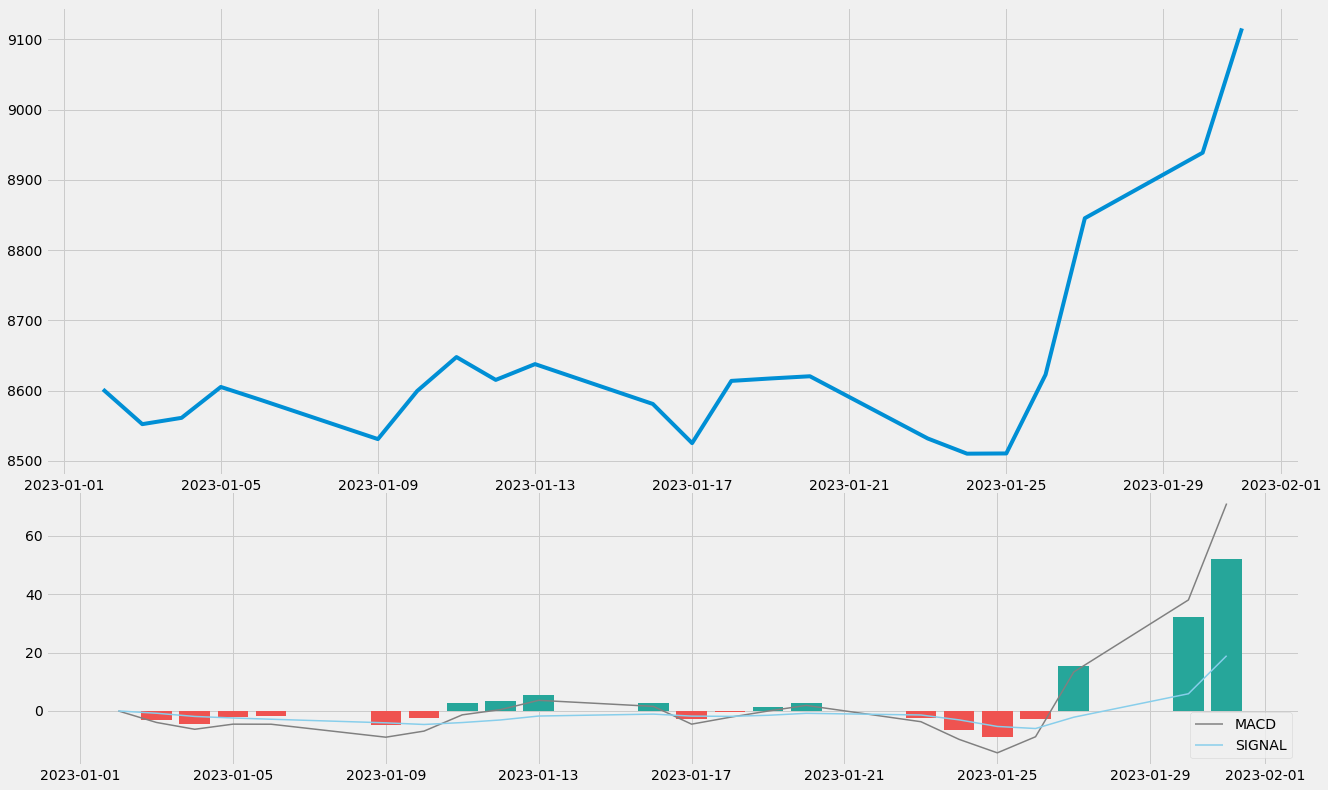

In [ ]:
def plot_macd(prices, macd, signal, hist):
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

plot_macd(df['Close'], bbca_macd['macd'], bbca_macd['signal'], bbca_macd['hist'])

In [ ]:
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal
            
buy_price, sell_price, macd_signal = implement_macd_strategy(df['Close'], bbca_macd)

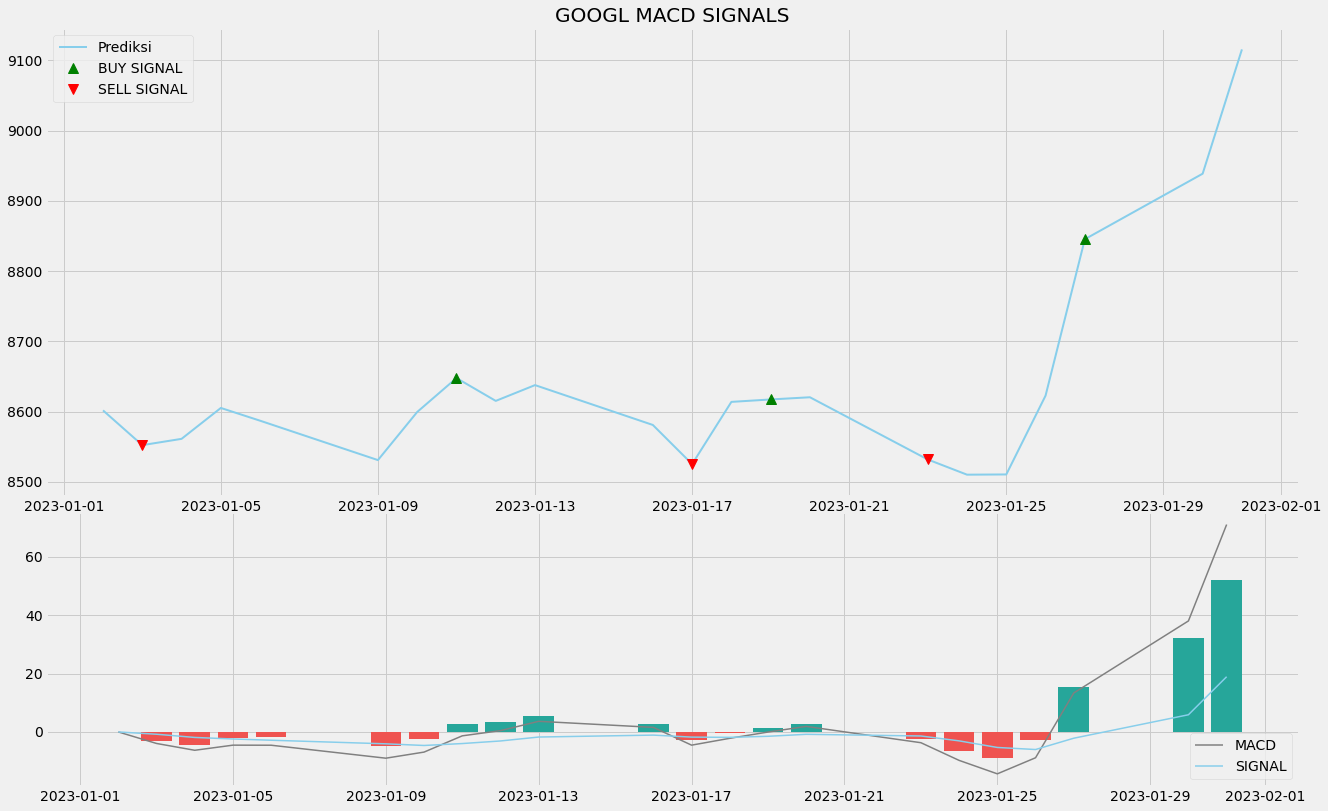

In [ ]:
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

ax1.plot(df['Close'], color = 'skyblue', linewidth = 2, label = 'Prediksi')
ax1.plot(df.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(df.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('GOOGL MACD SIGNALS')
ax2.plot(bbca_macd['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
ax2.plot(bbca_macd['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

for i in range(len(bbca_macd)):
    if str(bbca_macd['hist'][i])[0] == '-':
        ax2.bar(bbca_macd.index[i], bbca_macd['hist'][i], color = '#ef5350')
    else:
        ax2.bar(bbca_macd.index[i], bbca_macd['hist'][i], color = '#26a69a')
        
plt.legend(loc = 'lower right')
plt.show()